In [2]:
import sys
sys.path.append('..')

In [3]:
import numpy
import matplotlib.pyplot

In [4]:
import eaglecore.filters.linear
import eaglecore.psf

## Gaussian 1D

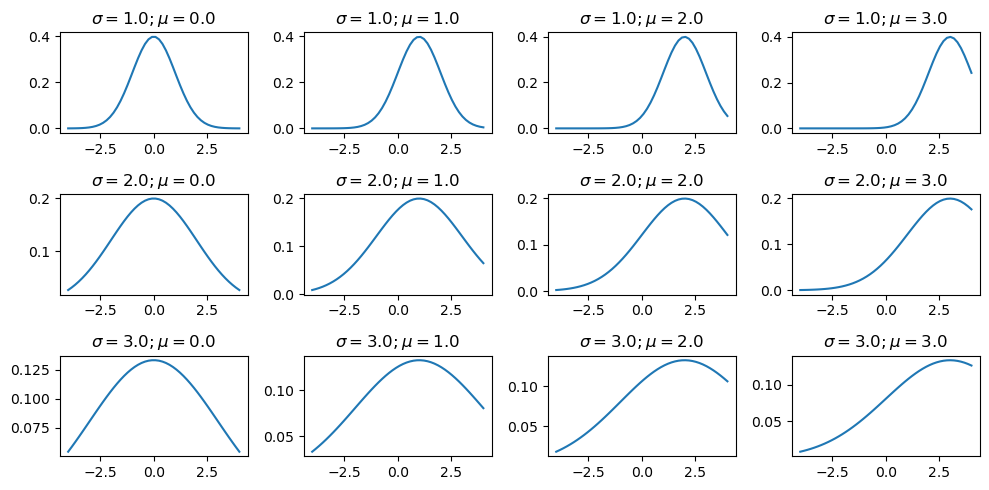

In [15]:
n = 4
x = numpy.linspace(start=-n, stop=n)

sigma = numpy.arange(start = 1.0, stop = 4.0, step=1.0)
mu = numpy.arange(start = 0.0, stop = 4.0, step=1.0)

n_sigma, n_mu = len(sigma), len(mu)


fig = matplotlib.pyplot.figure(figsize=(10, 5))

idx = 1
for i in range(0, n_sigma):
    for j in range(0, n_mu):
    
        matplotlib.pyplot.subplot(n_sigma, n_mu, idx)
        matplotlib.pyplot.title("$\sigma = {}; \mu = {}$".format(sigma[i], mu[j]))
        y = eaglecore.psf.gaussian1d(mu=mu[j], sigma=sigma[i], x=x)
        matplotlib.pyplot.plot(x, y)
        
        idx += 1
        
fig.tight_layout()
    
    

## Gaussian 2D

$\begin{align}
G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) 
= \frac{1}{2 \pi \sigma_0 \sigma_1} \times
e^{-\frac{(x_0 - \mu_0)^2}{2\sigma_{0}} - \frac{(x_1 - \mu_1)^2}{2\sigma_1}}
\end{align}$

#### For x :

$\begin{align}
\frac{d{G_{\sigma_0, \mu_0, \sigma_1, \mu_1}}}{d{x_{0}}}(x_{0}, x_{1})
&= \frac{d}{d{x_{0}}} (\frac{1}{2 \pi \sigma_0 \sigma_1} \times
e^{-\frac{(x_0 - \mu_0)^2}{2\sigma_{0}} - \frac{(x_1 - \mu_1)^2}{2\sigma_1}}) \\
&= -2 \times \frac{x_0 - \mu_0}{2\sigma_0} \times \frac{1}{2 \pi \sigma_0 \sigma_1}
e^{-\frac{(x_0 - \mu_0)^2}{2\sigma_{0}} - \frac{(x_1 - \mu_1)^2}{2\sigma_1}} \\
&= - \frac{x_0 - \mu_0}{\sigma_0} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
\end{align}$

$\begin{align}
\frac{d^{2}{G_{\sigma_0, \mu_0, \sigma_1, \mu_1}}}{d^{2}{x_{0}}}(x_{0}, x_{1})
&= \frac{d}{d{x_{0}}} (- \frac{x_0 - \mu_0}{\sigma_0} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1})) \\
&= \frac{d}{d{x_{0}}} (- \frac{x_0 - \mu_0}{\sigma_0}) \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) + (- 
\frac{x_0 - \mu_0}{\sigma_0}) \times \frac{d}{d{x_{0}}} G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
&= -\frac{1}{\sigma_0} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) + (- 
\frac{x_0 - \mu_0}{\sigma_0})^{2} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
&= ( (\frac{x_0 - \mu_0}{\sigma_0})^{2} -\frac{1}{\sigma_0}) 
\times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
\end{align}$ 

#### For y :

$\begin{align}
\frac{d{G_{\sigma_0, \mu_0, \sigma_1, \mu_1}}}{d{x_{1}}}(x_{0}, x_{1})  
&= -2 \times \frac{x_1 - \mu_1}{2\sigma_1} \times \frac{1}{2 \pi \sigma_0 \sigma_1}
e^{-\frac{(x_1 - \mu_1)^2}{2\sigma_1} - \frac{(x_1 - \mu_1)^2}{2\sigma_1}} \\
&= - \frac{x_1 - \mu_1}{\sigma_1} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
\end{align}$ 

$\begin{align}
\frac{d^{2}{G_{\sigma_0, \mu_0, \sigma_1, \mu_1}}}{d^{2}{x_{1}}}(x_{0}, x_{1})  
&= -\frac{1}{\sigma_1} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) + 
(- \frac{x_1 - \mu_1}{\sigma_1})^{2} \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
&= ( -\frac{1}{\sigma_1} + (\frac{x_1 - \mu_1}{\sigma_1})^{2} ) \times G_{\sigma_0, \mu_0, \sigma_1, \mu_1}(x_{0}, x_{1}) \\
\end{align}$ 